In [1]:
import pandas as pd
import numpy as np
import io
import os
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
from sklearn.metrics import mean_absolute_error
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
import scipy.stats as scs
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import seaborn; seaborn.set()
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
observation_df=pd.read_csv('/bigdata/tara/s427_sample.csv',index_col='timestamp', parse_dates=True)
#observation_df=observation_df.asfreq(pd.infer_freq(observation_df.index))
observation_df.head()

,operator_id,bikes,spaces,total_docks
timestamp,,,,
2018-01-01 00:00:00,427.0,6.0,37.0,43.0
2018-01-01 00:02:00,427.0,6.0,37.0,43.0
2018-01-01 00:04:00,427.0,6.0,37.0,43.0
2018-01-01 00:06:00,427.0,6.0,37.0,43.0
2018-01-01 00:08:00,427.0,6.0,37.0,43.0


In [3]:
observation_df = observation_df.asfreq('2Min')
observation_df=observation_df.fillna(method='ffill')
observation_df.index = pd.DatetimeIndex(observation_df.index.values,  freq=observation_df.index.inferred_freq)

In [5]:
freq=6 #the original freq of data is 2 minutes interval
interval=60 #for how many minutes ahead we want to predict
test_days=1 #the 40number of days for test
test_size=int(test_days*24*60/freq)
#step=int(interval/freq)
data=observation_df['2018-05-01':'2018-05-30']
data=data.resample(str(freq)+'min').median()
data= data[['spaces']]
step=10
X = data.values
train, test = X[1:len(X)-test_size], X[len(X)-test_size:]
history = [x for x in train]
res = sm.tsa.arma_order_select_ic(train, max_ar=5, max_ma=2, ic=['bic'])#,trend='c'
#print(res.aic_min_order)
print(res.bic_min_order)

(4, 2)


In [13]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train,
                            start_p=0, d=0, start_q=0,
                            max_p=2, max_d=0, max_q=0,
                            start_P=0, D=0, start_Q=0,
                            max_P=1, max_D=0, max_Q=0,
                            max_order=10, m=240,
                            seasonal=True, stationary=True,
                            information_criterion='aic',
                            alpha=0.05,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            n_jobs=-1,
                            maxiter=10)

/home/tara/anaconda3/lib/python3.7/site-packages/pmdarima/arima/auto.py:229: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: order=(4, 0, 2) seasonal_order=(0, 0, 0, 240); AIC=26452.239, BIC=26507.021, Fit time=7.029 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 240); AIC=56290.282, BIC=56303.978, Fit time=0.409 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 240); AIC=26998.432, BIC=27025.823, Fit time=1780.633 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 240); AIC=47477.153, BIC=47497.696, Fit time=1.294 seconds
Fit ARIMA: order=(4, 0, 2) seasonal_order=(1, 0, 0, 240); AIC=30305.951, BIC=30367.581, Fit time=1740.382 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 240); AIC=26818.080, BIC=26866.014, Fit time=2.278 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 240); AIC=26385.642, BIC=26433.576, Fit time=2.786 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 240); AIC=26382.917, BIC=26417.156, Fit time=1.071 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(1, 0, 0, 240); AIC=26355.200, BIC=26396.286, Fit time=1629.146 

/home/tara/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tara/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tara/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tara/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tara/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to conver

Test RMSE: 4.670
Test MAE: 2.651


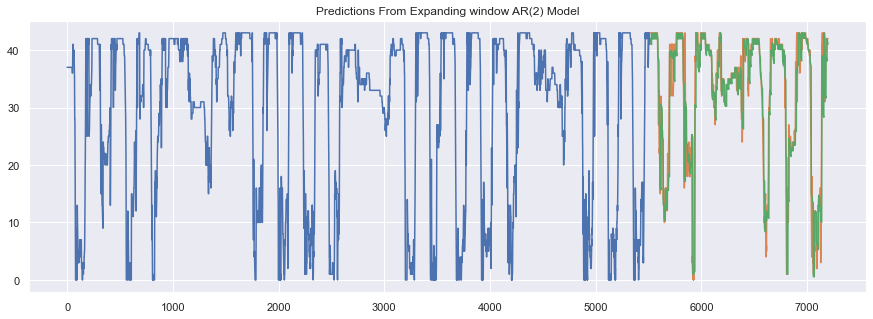

In [4]:
freq=6 #the original freq of data is 2 minutes interval
interval=60 #for how many minutes ahead we want to predict
test_days=1 #the 40number of days for test
test_size=int(test_days*24*60/freq)
#step=int(interval/freq)
data=observation_df['2018-04-01':'2018-04-30']
data=data.resample(str(freq)+'min').median()
data= data[['spaces']]
step=10
X = data.values
train, test = X[1:len(X)-test_size], X[len(X)-test_size:]
history = [x for x in train]
predictions = list()
# walk-forward validation

for t in range(0,len(test),step):
    # fit model
    model = SARIMAX(history,order=(2,0,0),seasonal_order=(2,0,0,240),enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    
    # one step forecast
    yhat = model_fit.predict(start=len(history), end=len(history)+step-1, dynamic=False)

    predictions.extend(yhat)
    history.extend(test[t:t+step])
    

for i in range(0,len(predictions)):
    if predictions[i]<0:
        predictions[i]=0
    if predictions[i]>43:
        predictions[i]=43
rmse = sqrt(mean_squared_error(test, predictions))
mae= mean_absolute_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.plot([None for i in train] + [x for x in predictions])
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.title('Predictions From Expanding window AR(2) Model')
pyplot.show()

Test RMSE: 5.636
Test MAE: 3.748


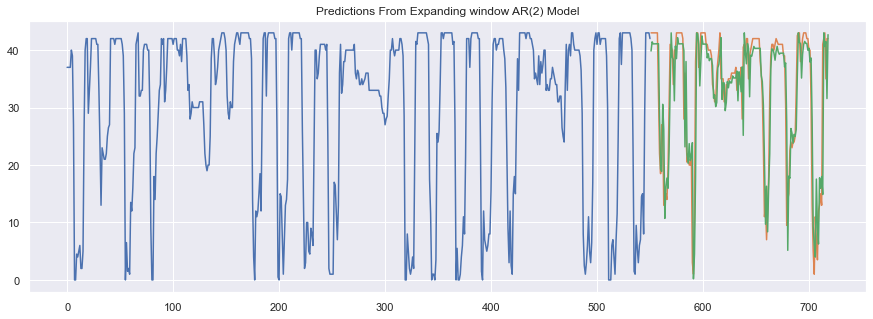

In [7]:
freq=60 #the original freq of data is 2 minutes interval
interval=60 #for how many minutes ahead we want to predict
test_days=7 #the 40number of days for test
test_size=int(test_days*24*60/freq)
#step=int(interval/freq)
data=observation_df['2018-06-01':'2018-05-30']
data=data.resample(str(freq)+'min').median()
data= data[['spaces']]
step=1
X = data.values
train, test = X[1:len(X)-test_size], X[len(X)-test_size:]
history = [x for x in train]
predictions = list()
# walk-forward validation

for t in range(0,len(test),step):
    # fit model
    model = AutoReg(history, lags=2)
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.predict(start=len(history), end=len(history)+step-1, dynamic=False)

    predictions.extend(yhat)
    history.extend(test[t:t+step])
    

for i in range(0,len(predictions)):
    if predictions[i]<0:
        predictions[i]=0
    if predictions[i]>43:
        predictions[i]=43
rmse = sqrt(mean_squared_error(test, predictions))
mae= mean_absolute_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.plot([None for i in train] + [x for x in predictions])
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.title('Predictions From Expanding window AR(2) Model')
pyplot.show()

In [411]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    if p_value <= signif:

        return True
        
    else:

        return False

In [2]:
df=pd.read_csv("/bigdata/tara/ind_london_2018_sample.csv",index_col=0)
df.head()

/home/tara/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,operator_id,bikes,spaces,total_docks,timestamp
11,12,13,36,49,2018-01-01 00:00:00
13,14,35,13,48,2018-01-01 00:00:00
16,17,19,7,26,2018-01-01 00:00:00
17,18,9,18,27,2018-01-01 00:00:00
30,32,19,24,43,2018-01-01 00:00:00


In [3]:
#[120, 101, 579, 127, 340, 136, 71, 557, 48, 509, 126, 55, 215, 275,427]

station_id=361
#71,215,785,341,553,104,361,111,404,66

In [61]:
import utils

In [76]:
station_id=361
freq=60 #the original freq of data is 2 minutes interval
interval=60 #for how many minutes ahead we want to predict
test_days=7 #the 40number of days for test
test_size=int(test_days*24*60/freq)
step=int(interval/freq)

data=df[df['operator_id']==station_id]
data['timestamp']=data['timestamp'].values.astype('<M8[m]')
data=data.set_index('timestamp')
data=data['2018-01-01':'2018-12-31']

data=data.resample(str(freq)+'T').mean()
data= data[['spaces']]
data=data.fillna(method='ffill')

/home/tara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [77]:
#utils.plot_series(data)

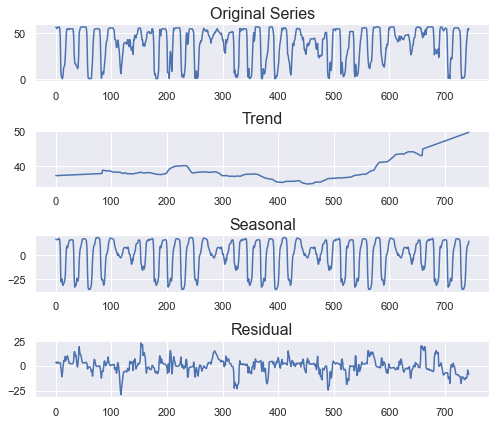

In [17]:
plt.figure(figsize=(7,6))

plt.subplot(4,1,1)
plt.plot(spaces_series_np)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)

plt.title('Residual', fontsize=16)

plt.tight_layout()

In [18]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev
anomalies = data[(resid < lower) | (resid > upper)]
# anomalies

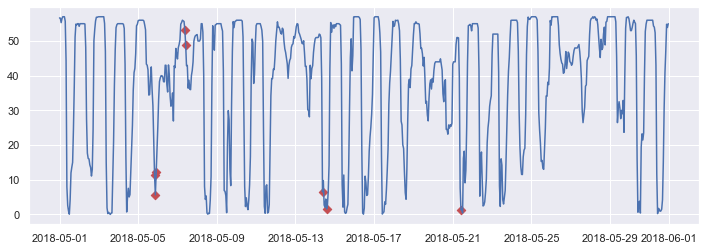

In [19]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.scatter(anomalies.index, anomalies.spaces, color='r', marker='D')

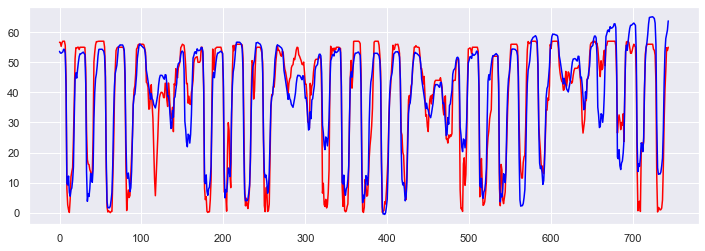

In [20]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(spaces_series_np,color='red')
plt.plot(estimated,color='blue')

In [39]:
# avg, dev = data.spaces.mean(), data.spaces.std()
# data['spaces'] = (data['spaces'] - avg) / dev

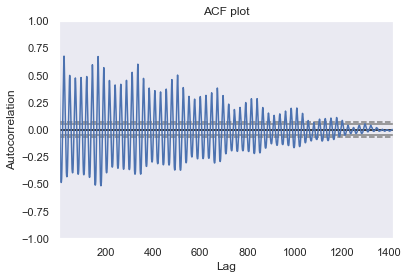

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)#.set_xlim([160, 175])
plt.title('ACF plot')
pyplot.show()

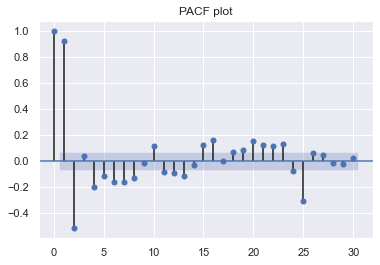

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_pacf(data, lags=30)
plt.title('PACF plot')
pyplot.show()

In [22]:
df_train, df_test = data[0:len(data)-test_size], data[len(data)-test_size:]


/home/tara/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/home/tara/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Test RMSE: 17.490
Test mae: 12.907


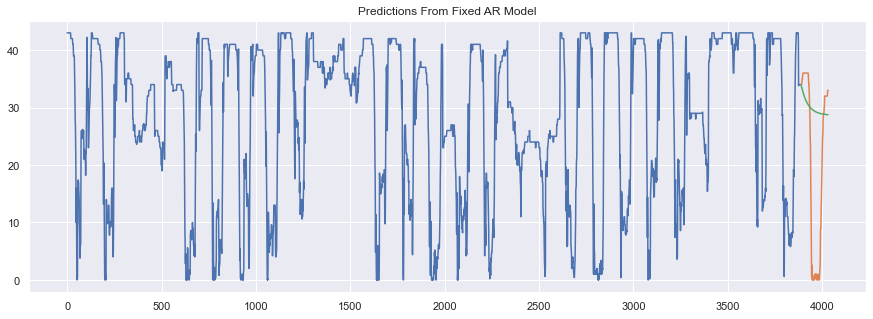

In [28]:
X = data.values
train, test = X[0:len(X)-test_size], X[len(X)-test_size:]
#predict n step
model = AutoReg(train, lags=2)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(data)-1, dynamic=False)

rmse = sqrt(mean_squared_error(test, predictions))
mae= mean_absolute_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test mae: %.3f' % mae)
# plot results
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.plot([None for i in train] + [x for x in predictions])
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.title('Predictions From Fixed AR Model')
pyplot.show()

Test RMSE: 20.477
Test MAE: 14.612


/home/tara/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


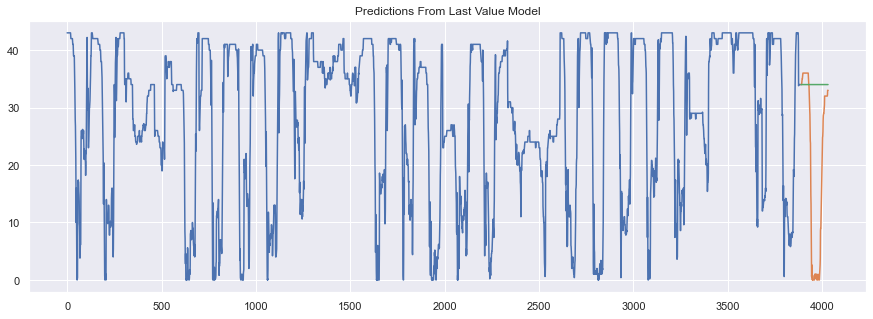

In [29]:
X = data.values
train, test = X[0:len(X)-test_size], X[len(X)-test_size:]
#predict n step

predictions =[train[-1][0]]*len(test)

rmse = sqrt(mean_squared_error(test, predictions))
mae= mean_absolute_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
# plot results
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.plot([None for i in train] + [x for x in predictions])
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.title('Predictions From Last Value Model')
pyplot.show()

Test RMSE: 8.753
Test MAE: 6.993


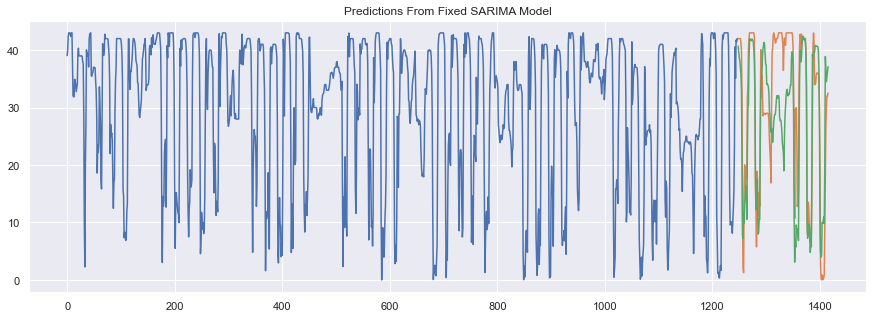

In [45]:
import time
start=time.time()
X = data.values
train, test = X[0:len(X)-test_size], X[len(X)-test_size:]
#predict n step
model = SARIMAX(train,order=(2,0,0),seasonal_order=(2,1,0,int(10080/freq)),enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test, predictions))
mae= mean_absolute_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
# plot results
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.plot([None for i in train] + [x for x in predictions])
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.title('Predictions From Fixed SARIMA Model')
end=time.time()
pyplot.show()

# A.

In [4]:
data= observation_df[['bikes','spaces','total_docks']]

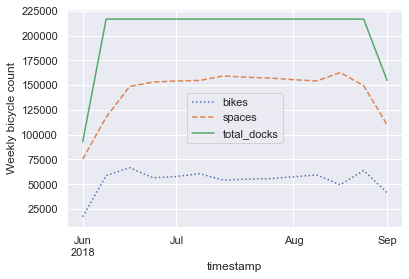

In [5]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

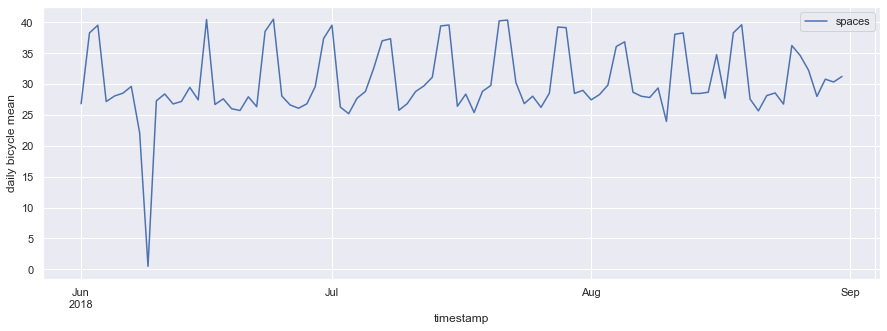

In [6]:
# what happened in 2018-06-09
#here we have one value per day, just to see if any thing strange happened
data= observation_df[['spaces']]
daily = data.resample('D').mean()
daily.plot(figsize=(15,5))
plt.ylabel('daily bicycle mean');

Observations: 66240
Training Observations: 39744
Testing Observations: 26496


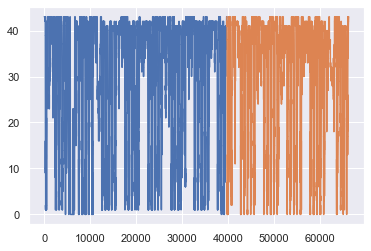

In [7]:
X = data.values
train_size = int(len(X) * 0.60)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])


<Figure size 720x360 with 0 Axes>

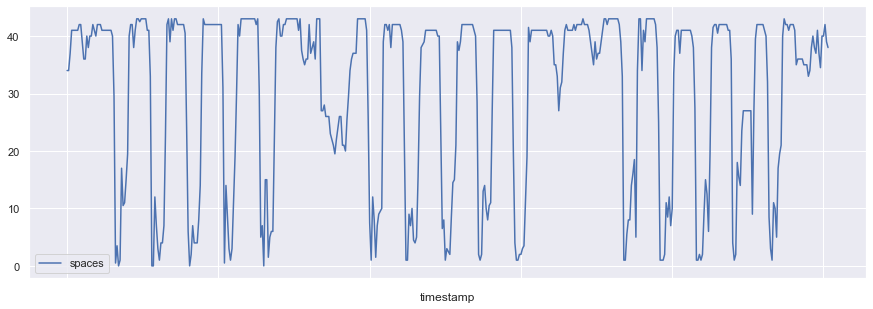

In [8]:
#3 weeks observation, we see that weekends are abnormalities
plt.figure(figsize=(10,5))

data=observation_df['2018-06-11':'2018-07-01']
#data=data[data.index.weekday < 5]
data= data[['spaces']]
hourly_trip = data.resample('H').median()
hourly_trip.groupby([hourly_trip.index.day,hourly_trip.index.time]).mean().plot(figsize=(15,5))
plt.xlabel('timestamp');

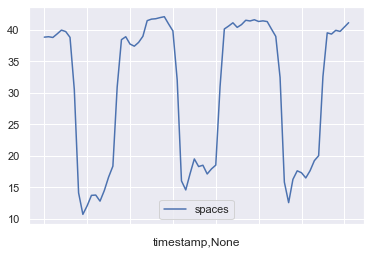

In [9]:
#pattern of 3 month
data= observation_df[['spaces']]
hourly_trip = data.resample('H').median()
hourly_trip.groupby([hourly_trip.index.month,hourly_trip.index.time]).mean().plot()

#plt.ylabel('Weekly bicycle count');

<Figure size 720x360 with 0 Axes>

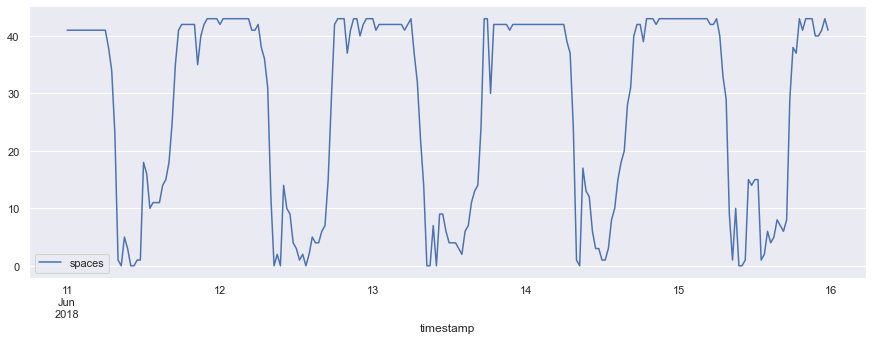

In [10]:
# observation_df=observation_df['2018-06-04':]
# data= observation_df[['spaces']]
# hourly_trip = data.resample('H').median()
# hourly_trip.groupby([hourly_trip.index.week,hourly_trip.index.time]).mean().plot(figsize=(10,5))
plt.figure(figsize=(10,5))
data=observation_df['2018-06-11':'2018-06-15']
data= data[['spaces']]
hourly_trip = data.resample('30min').median()
#hourly_trip.groupby([hourly_trip.index.day,hourly_trip.index.time]).mean().plot(figsize=(15,5))
hourly_trip.plot(figsize=(15,5))
plt.xlabel('timestamp');

## 1-Persistence Model/Naive forecast

In [41]:

#data=observation_df['2018-06-11':'2018-06-15']

data=observation_df['2018-07-01':'2018-07-30']
data=data[data.index.weekday < 5]
data= data[['spaces']]
data = data.resample('30min').median()
data=data.dropna()

9.574271077563381
7.983054970790735
5.640257086339239


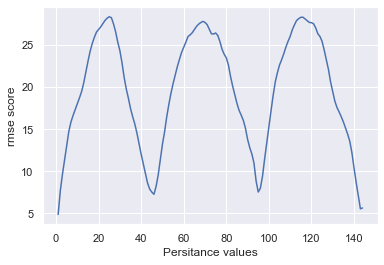

In [42]:
# load data
#series = read_csv('car-sales.csv', header=0, index_col=0)
# prepare data
X = data.values
train, test = X[1:len(X)-48], X[len(X)-48:]
persistence_values = range(1, 145)
scores = list()
for p in persistence_values:
	# walk-forward validation
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		# make prediction
		yhat = history[-p]
		predictions.append(yhat)
		# observation
		history.append(test[i])
	# report performance
	rmse = sqrt(mean_squared_error(test, predictions))
	scores.append(rmse)
	#print('p=%d RMSE:%.3f' % (p, rmse))
# plot scores over persistence values
pyplot.plot(persistence_values, scores)
print(scores[47])
print(scores[95])
print(scores[143])
pyplot.xlabel('Persitance values')
pyplot.ylabel('rmse score')
pyplot.show()

### using the t-48 model to make a prediction 

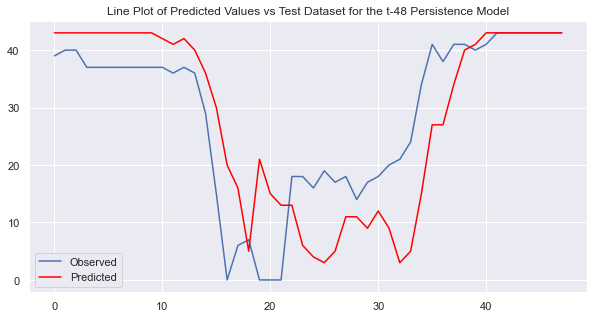

RMSE: 9.574


In [43]:
# walk-forward validation
plt.figure(figsize=(10,5))
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	yhat = history[-48]
	predictions.append(yhat)
	# observation
	history.append(test[i])
# plot predictions vs observations
plt.plot(test,label='Observed')
plt.plot(predictions,label='Predicted', color='red')
plt.title('Line Plot of Predicted Values vs Test Dataset for the t-48 Persistence Model')
plt.legend()
plt.show()
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

## 2-Expanding Window Forecast

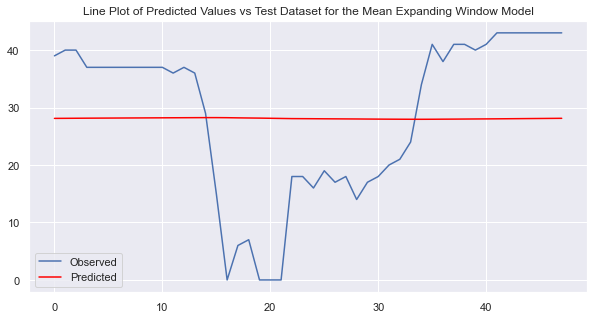

RMSE: 13.860


In [44]:
#An expanding window refers to a model that calculates a 
#statistic on all available historic data and uses that to make a forecast.
#It is an expanding window because it grows as more real observations are collected.
plt.figure(figsize=(10,5))
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	yhat = np.mean(history)
	predictions.append(yhat)
	# observation
	history.append(test[i])
# plot predictions vs observations
plt.plot(test,label='Observed')
plt.plot(predictions,label='Predicted', color='red')
plt.title('Line Plot of Predicted Values vs Test Dataset for the Mean Expanding Window Model')
plt.legend()
plt.show()
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

## 3-Rolling Window Forecast

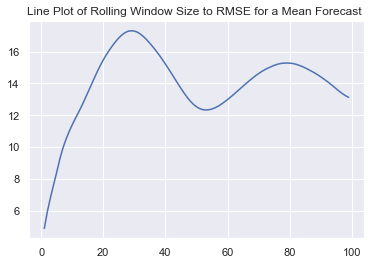

In [45]:
#trying different window size from 1 to 100
window_sizes = range(1, 100)
scores = list()
for w in window_sizes:
	# walk-forward validation
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		# make prediction
		yhat = np.mean(history[-w:])
		predictions.append(yhat)
		# observation
		history.append(test[i])
	# report performance
	rmse = sqrt(mean_squared_error(test, predictions))
	scores.append(rmse)
	#print('w=%d RMSE:%.3f' % (w, rmse))
# plot scores over window sizes values
pyplot.plot(window_sizes, scores)
plt.title('Line Plot of Rolling Window Size to RMSE for a Mean Forecast ')
pyplot.show()
#the best window size is w=1

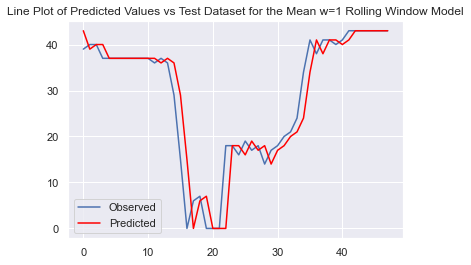

RMSE: 4.873


In [46]:
# walk-forward validation with w=1
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	yhat = np.mean(history[-1:])
	predictions.append(yhat)
	# observation
	history.append(test[i])
# plot predictions vs observations
plt.plot(test,label='Observed')
plt.plot(predictions,label='Predicted', color='red')
plt.title('Line Plot of Predicted Values vs Test Dataset for the Mean w=1 Rolling Window Model')
plt.legend()
plt.show()
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# B.

In [8]:
data=observation_df['2018-07-01':'2018-07-15']
data= data[['spaces']]
data=data.asfreq(pd.infer_freq(data.index))
data = data.resample('60min').median()
# data=data.dropna()

### Anomaly Detection

In [9]:
stl=STL(data)
result=stl.fit()

In [10]:
seasonal , trend, resid = result.seasonal , result.trend, result.resid

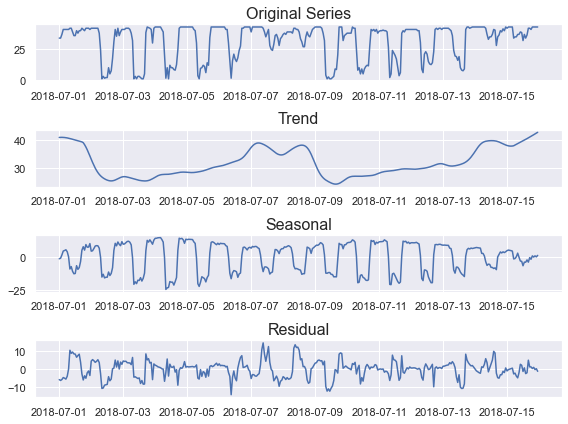

In [11]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(data)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

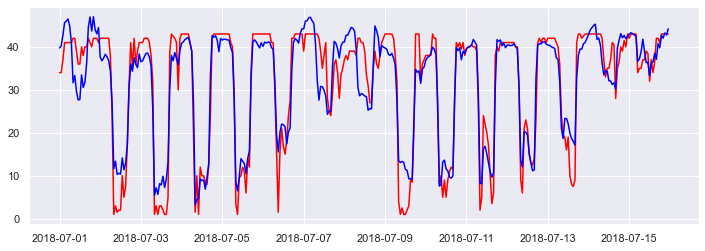

In [13]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(data,color='red')
plt.plot(estimated,color='blue')

In [60]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev
anomalies = data[(resid < lower) | (resid > upper)]
anomalies

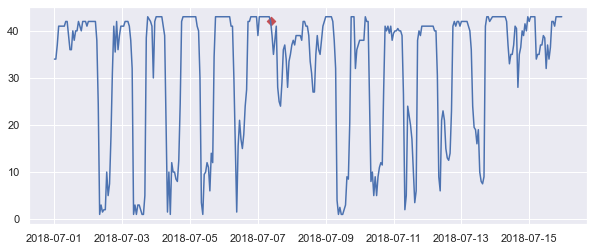

In [69]:

plt.figure(figsize=(10,4))
plt.plot(data)

    
plt.scatter(anomalies.index, anomalies.spaces, color='r', marker='D')

In [11]:
 #initial setup
freq=60 #the original freq of data is 2 minutes interval
interval=60 #for how many minutes ahead we want to predict
test_days=1 #the number of days for test
test_size=int(test_days*24*60/freq)
#step=int(interval/freq)

In [12]:
# t=10 
# test_days=7
# test_size=int(test_days*24*60/5)
# step=int(t/5)

In [14]:
report_df = pd.DataFrame(columns=['RMSE','MAE','Time','Model'])
index=0

## Persistence Model
##### This is our baseline

In [15]:
def model_persistence(interval):
    global index
    t=interval
    step=int(interval/freq)
    # create lagged dataset
    values = DataFrame(data.values)
    dataframe = concat([values.shift(int(t/freq)), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    #print(dataframe.head())
    # split into train and test sets
    X = dataframe.values
    train, test = X[1:len(X)-test_size], X[len(X)-test_size:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    # #persistence model
    # def model_persistence(x):
    # 	return x

    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = x
        predictions.append(yhat)
    #rmse = sqrt(mean_squared_error(test_y, predictions))

    test_t=test_y[step-1::step]
    prediction_t=predictions[step-1::step]
    rmse = sqrt(mean_squared_error(test_t, prediction_t))
    mae= mean_absolute_error(test_t, prediction_t)
    report_df.at[index,'RMSE']=rmse
    report_df.at[index,'MAE']=mae
    report_df.at[index,'Time']=t
    report_df.at[index,'Model']= 'persistence model'
    index=index+1
#     print('Test RMSE: %.3f' % rmse)

#     # plot predictions vs expected
#     pyplot.plot(test_y)
#     pyplot.plot(predictions, color='red')
#     pyplot.show()

In [86]:
for i in range(2,122,2):
    model_persistence(i)

## Autocorrelation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


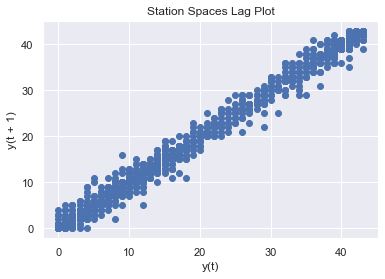

In [7]:
from pandas.plotting import lag_plot

#here we calculate the pearson correlation for lag=1 value
lag_plot(data)
plt.title('Station Spaces Lag Plot')
pyplot.show()
#We can see a large ball of observations along a diagonal line of the plot. 
#It clearly shows a relationship or some correlation.

In [19]:
#here we calculate the pearson correlation for lag=1 value
# values = pd.DataFrame(data.values)
# dataframe = pd.concat([values.shift(1), values], axis=1)
# dataframe.columns = ['t-1', 't+1']
# result = dataframe.corr()
# print(result)

In [131]:
#5 min data
data=observation_df['2018-07-01':'2018-07-30']
#data=data[data.index.weekday < 5]
data= data[['spaces']]
#data = data.resample('60min').median()
data=data.dropna()

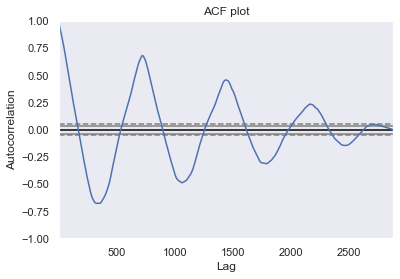

In [8]:
#ploting the correlation coefficient for each lag variable.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.title('ACF plot')
pyplot.show()

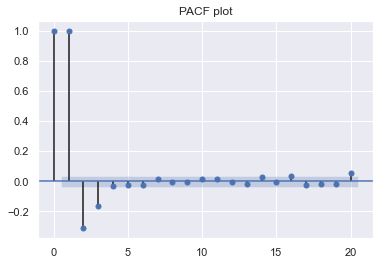

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_pacf(data, lags=20)
plt.title('PACF plot')
pyplot.show()

## Autoregression Model

In [22]:
# data=observation_df['2018-07-01':'2018-07-30']
# data=data[data.index.weekday < 5]
# data= data[['spaces']]
# data = data.resample('5min').median()
# data=data.dropna()

### Fixed AR

Test RMSE: 15.068


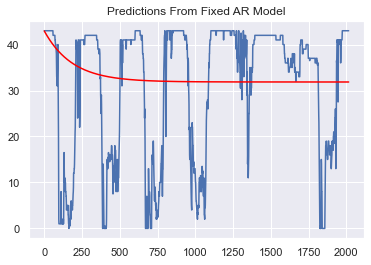

In [23]:
X = data.values
train, test = X[1:len(X)-test_size], X[len(X)-test_size:]
model = AutoReg(train, lags=1)
model_fit = model.fit()
#print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# for i in range(len(predictions)):
# 	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.title('Predictions From Fixed AR Model')
pyplot.show()

In [65]:
test_size

720

## Rolling AR

In [81]:
def AR(interval):
    global index
    
    step=int(interval/freq)
    X = data.values
    train, test = X[1:len(X)-test_size], X[len(X)-test_size:]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(0,len(test),step):
        # fit model
        model = AutoReg(history, lags=2)
        model_fit = model.fit()
        # one step forecast
        yhat = model_fit.predict(start=len(history), end=len(history)+step-1, dynamic=False)
        
        # store forecast and ob
    #	print(yhat)
        predictions.extend(yhat)
        history.extend(test[t:t+step])
    #	print(history)
    #	break
    # evaluate forecasts
    #rmse = sqrt(mean_squared_error(test, predictions))
    
    
    predictions=predictions[0:test_size]
   
    test_t=test[step-1::step]
    prediction_t=predictions[step-1::step]
    rmse = sqrt(mean_squared_error(test_t, prediction_t))
    mae= mean_absolute_error(test_t, prediction_t)
    report_df.at[index,'RMSE']=rmse
    report_df.at[index,'MAE']=mae
    report_df.at[index,'Time']=interval
    report_df.at[index,'Model']= 'AR'
    index=index+1
    # print('Test RMSE: %.3f' % rmse)
    # # plot forecasts against actual outcomes
    # pyplot.plot(test)
    # pyplot.plot(predictions, color='red')
    # pyplot.show()

In [88]:
for i in range(2,122,2):
    AR(i)